In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("../Results/NGC3324.csv")

In [ ]:
10+37/60

10.616666666666667

In [ ]:
df.head()

,Unnamed: 0,ra,dec,3.6mag,d_3.6mag,4.5mag,d_4.5mag,5.8mag,d_5.8mag,8mag,d_8mag,24mag,d_24mag,alpha,Predictions
0,0,159.007187,-59.870358,12.159,0.095,12.229,0.106,12.110,0.150,11.762,0.141,-99.0,-99.0,-2.05412,2.0
1,1,157.911469,-59.618675,12.113,0.051,12.089,0.100,11.929,0.079,11.695,0.082,-99.0,-99.0,-2.17384,2.0
2,2,159.510300,-59.958832,11.938,0.046,11.993,0.060,11.995,0.108,11.690,0.075,-99.0,-99.0,-2.32308,2.0
3,3,161.164062,-58.501041,11.752,0.077,11.742,0.088,11.801,0.105,11.799,0.170,-99.0,-99.0,-2.91348,2.0
4,4,160.358612,-59.262127,12.217,0.052,12.282,0.083,11.949,0.128,12.265,0.166,-99.0,-99.0,-2.79212,2.0


array([[<AxesSubplot:title={'center':'Predictions'}>]], dtype=object)

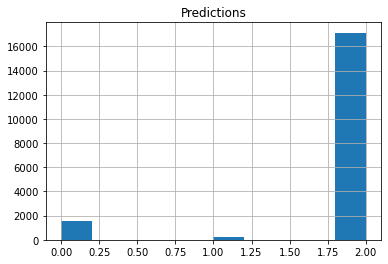

In [ ]:
df.hist("Predictions")

In [ ]:
m36 = df[["3.6mag"]].values.astype(float)
m8 = df[["8mag"]].values.astype(float)
preds = df[["Predictions"]].values.astype(int)
ra = df[["ra"]].values.astype(float)
dec = df[["dec"]].values.astype(float)

yso = np.where(preds==0)[0]


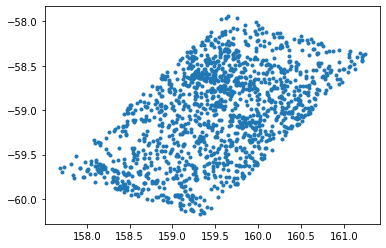

In [ ]:
plt.plot(ra[yso],dec[yso],'.')

In [ ]:

n3324 = np.load("../Results/NGC3324_Predictions.npy")

In [ ]:
ra = n3324[:,0].reshape((-1, 1))
dec = n3324[:,1].reshape((-1, 1))
m8 = n3324[:,8].reshape((-1, 1))
preds= n3324[:,-1].reshape((-1, 1))
yso = np.where(preds==0)[0]
np8 = np.hstack((ra,dec,m8,preds))
np8.shape
# np8

(18922, 4)

In [ ]:
# fig, ax = plt.subplots(figsize=(14,14),dpi=100)
# x,y = np.meshgrid(dec, ra)
# z = 0*np.sqrt(x**2 + y**2)

# plt.scatter(x,y,s=.5,c='k')
# plt.scatter(dec[yso],ra[yso],c=m8[yso],s=.5,cmap="autumn")

# xb = [-58.6872,-58.5683,-58.5522,-58.6703]
# yb = [159.25,159.3042,159.1708,159.1167]
# ax.add_patch(patches.Polygon(xy=list(zip(xb,yb)),edgecolor='r', fill=False))
# # box = patches.Rectangle((-58.41, 158), 0.07, 3,edgecolor='r', facecolor='none')
# # ax.add_patch(box)
# fig, ax = plt.subplots(figsize=(14,14),dpi=100)

# plt.scatter(x,y,s=.5,c='k')
# plt.scatter(dec,ra,c=m8,s=.5,cmap="autumn")
# xb = [-58.6872,-58.5683,-58.5522,-58.6703]
# yb = [159.25,159.3042,159.1708,159.1167]
# ax.add_patch(patches.Polygon(xy=list(zip(xb,yb)),edgecolor='r', fill=False))

In [ ]:
n33_nan = np.load("NGC3324_NAN_INP.npy")

nan_ra = n33_nan[:,0]
nan_dec = n33_nan[:,1]

In [ ]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename


Set DATE-AVG to '2022-06-03T12:17:28.706' from MJD-AVG.
Set DATE-END to '2022-06-03T14:54:43.830' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -31.568124 from OBSGEO-[XYZ].
Set OBSGEO-H to 1654350045.384 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


159.09781327072795


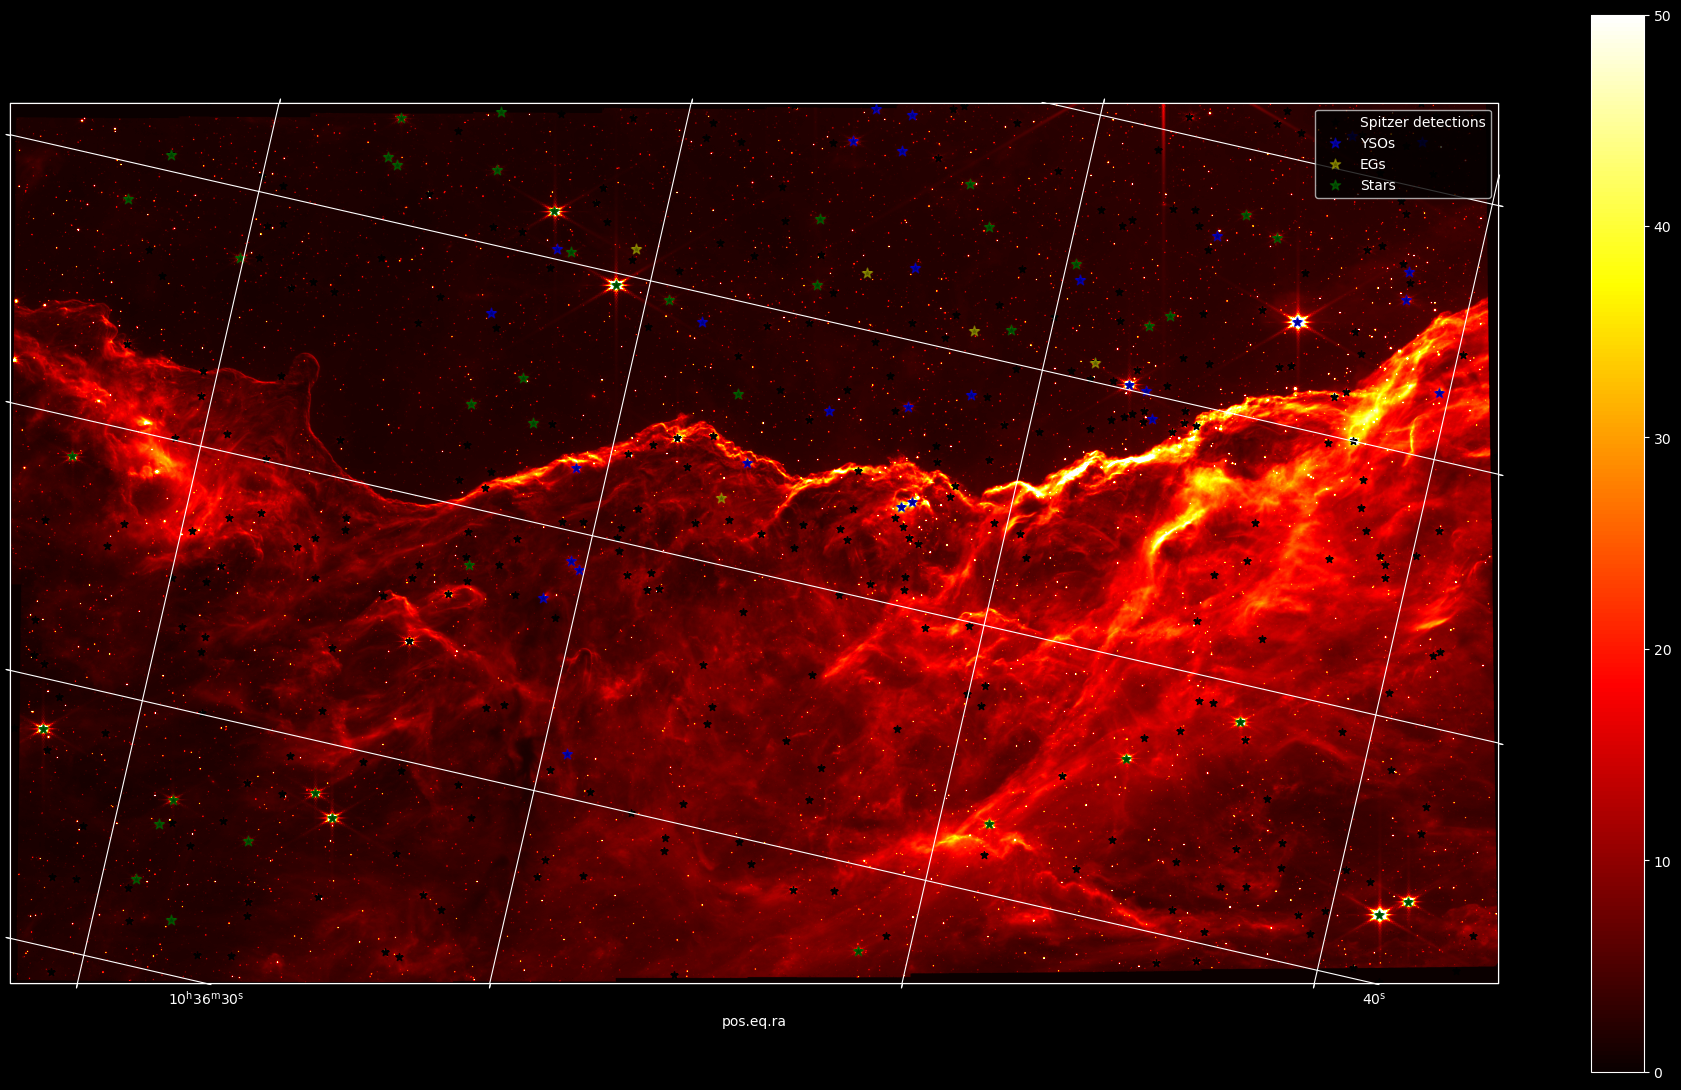

In [ ]:
filter = "f335m"
image_file = f"../../../ngc3324/FITS/JWST_{filter}.fits"
filename = get_pkg_data_filename(image_file)

h = fits.getheader(image_file)

f = fits.open(image_file)

wcs = WCS(f[1].header)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(24,14),dpi=100)
ax = plt.subplot(projection=wcs)

plt.grid(color='white', ls='solid')
plt.imshow(f[1].data,cmap='hot',vmin=0,vmax=50,origin='lower') #vmax =1500 for f1800w
ymax, ymin = ax.get_ylim()
xmax, xmin = ax.get_xlim()
plt.colorbar()

ras, decs = wcs.wcs_pix2world(np.linspace(-500,15000,100), np.linspace(-500,16000,100), 1)
print(min(ras))

np8 = np.hstack((ra,dec,m8,preds))
np8 = np8[np8[:,0]>min(ras)]
np8 = np8[np8[:,0]<max(ras)]
np8 = np8[np8[:,1]>min(decs)]
np8 = np8[np8[:,1]<max(decs)]
yso = np.where(np8[:,-1]==0)[0]
egs = np.where(np8[:,-1]==1)[0]
sta = np.where(np8[:,-1]==2)[0]
n33_nan = np.load("../Data/NGC3324_NAN_INP.npy")
n33_nan = n33_nan[n33_nan[:,0]>min(ras)]
n33_nan = n33_nan[n33_nan[:,0]<max(ras)]
n33_nan = n33_nan[n33_nan[:,1]>min(decs)]
n33_nan = n33_nan[n33_nan[:,1]<max(decs)]
ax.scatter(n33_nan[:,0],n33_nan[:,1], marker='*', color='k', s=30, transform=ax.get_transform('fk5'), label = "Spitzer detections")
ax.scatter(np8[yso,0],np8[yso,1], marker='*', c='b',s=60, alpha=0.5, transform=ax.get_transform('fk5'), label = "YSOs")
ax.scatter(np8[egs,0],np8[egs,1], marker='*', c='y',s=60, alpha=0.5, transform=ax.get_transform('fk5'), label = "EGs")
ax.scatter(np8[sta,0],np8[sta,1], marker='*', c='g',s=60, alpha=0.5, transform=ax.get_transform('fk5'), label = "Stars")
ax.set_ylim(ymax, ymin)
ax.set_xlim(xmax, xmin)
plt.legend(loc=1)
plt.xticks()

plt.savefig(f"../../../ngc3324/NGC3324_ALL_W_NAN_Label_{filter}.png",dpi=100)
